In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("D:/churn prediction/data/Teleco-Customer-churn.csv")
print("original dataset shape",df.shape)

original dataset shape (7043, 21)


In [6]:
# handling missing values (TotalCharges sometimes is object due to spaces -> convert to numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
# drop rows with misssing values
df.dropna(inplace=True)
print("after dropping missing values",df.shape)

after dropping missing values (7032, 21)


In [8]:
duplicates = df.duplicated().sum()
print("numner of duplicate rows:",duplicates)

numner of duplicate rows: 0


In [9]:
if duplicates > 0:
    df.drop_duplicates()
    print("after removing duplicates",df.shape)

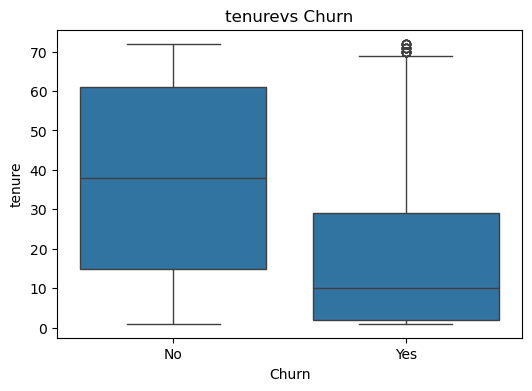

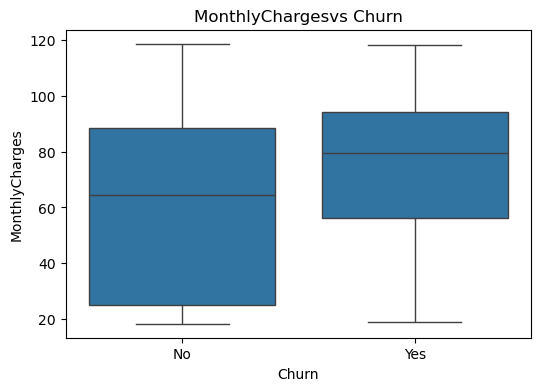

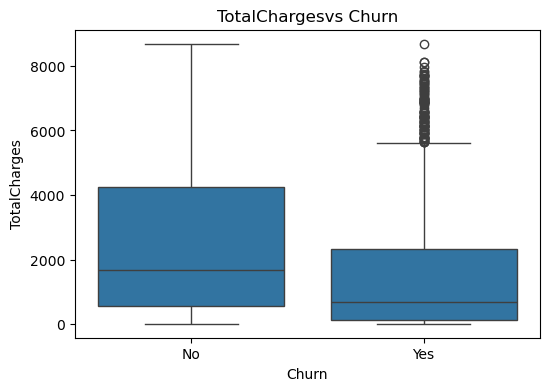

In [10]:
if 'customerID' in df.columns:
    df.drop('customerID',axis=1,inplace=True)

#----------------------------------------------------------------
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col}vs Churn')
    plt.show()

df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [11]:
# encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# split into features and target
X=df.drop('Churn',axis=1)
y=df['Churn']

In [12]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
print("Train shape:",X_train.shape)

Train shape: (5625, 30)


In [14]:
print("Test shape:",X_test.shape)

Test shape: (1407, 30)


In [15]:
X_train.to_csv("data/X_train.csv",index=False)
X_test.to_csv("data/X_test.csv",index=False)
y_train.to_csv("data/y_train.csv",index=False)
y_test.to_csv("data/y_test.csv",index=False)
